In [33]:
import librosa
import numpy as np
import scipy.io
import scipy
import matplotlib.pyplot as plt    
import seaborn
from IPython.display import Audio
from mpl_toolkits.mplot3d import Axes3D

seaborn.set(style='ticks')

In [34]:
signal_array = []

signaal1, sr1 = librosa.load("output1voice.wav")
signaal2, sr2 = librosa.load("output2voice.wav")
signaal3, sr3 = librosa.load("output3voice.wav")
signaal4, sr4 = librosa.load("output4voice.wav")
signaal5, sr5 = librosa.load("output5voice.wav")
signaal6, sr6 = librosa.load("output6voice.wav")
signaal7, sr7 = librosa.load("output7voice.wav")
signaal8, sr8 = librosa.load("output8voice.wav")

signal_array.append(signaal1)
signal_array.append(signaal2)
signal_array.append(signaal3)
signal_array.append(signaal4)
signal_array.append(signaal5)
signal_array.append(signaal6)
signal_array.append(signaal7)
signal_array.append(signaal8)

In [35]:
noise, sr9 = librosa.load("noise4.wav")

<h2>SNR calculation</h2>

In [36]:
snr_list = []
counter = 0
for sig in signal_array:
    noise_free_power = np.mean(np.square(noise))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)


SNR value for the recording number 1  (dB): 13.209391832351685
SNR value for the recording number 2  (dB): 12.59469985961914
SNR value for the recording number 3  (dB): 14.275141954421997
SNR value for the recording number 4  (dB): 14.255107641220093
SNR value for the recording number 5  (dB): 9.979104995727539
SNR value for the recording number 6  (dB): 13.86317253112793
SNR value for the recording number 7  (dB): 13.77548098564148
SNR value for the recording number 8  (dB): 10.992985963821411


<h2>Speech recognition</h2>

In [37]:
import speech_recognition as sr
import editdistance
r = sr.Recognizer()

In [38]:
sound = sr.AudioFile('output6voice.wav')

with sound as source:
    audio = r.record(source)
eesti_text = r.recognize_google(audio, language="et-EE")

print("Recognized text:", eesti_text)

Recognized text: tere kuidas läheb kas on võimalik mind aidata


<h2>Visual data representation</h2>

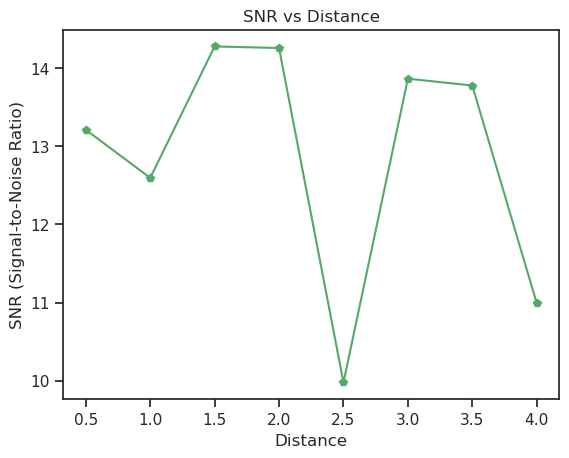

In [39]:
distance_points = [0.5,1,1.5,2,2.5,3,3.5,4]
plt.plot(distance_points, snr_list, marker='p', linestyle='-', color='g')

plt.xlabel('Distance')
plt.ylabel('SNR (Signal-to-Noise Ratio)')
plt.title('SNR vs Distance')
plt.show()

#REMEASURE USING THE ESTONIAN RECORDING WITH MY RODE NT1 MIC, THEN PLAY THE RECODING WITH A SINGLE SPEAKER

#Do these measurements multiple times, change the env, chnage the directionality

In [40]:
# unique_points = list(set(zip(distance_points, snr_list)))

# # Unpack the unique points
# distance_points, snr_list = zip(*unique_points)

# # Create a meshgrid
# x = np.linspace(min(distance_points), max(distance_points), 100)
# z = np.linspace(min(snr_list), max(snr_list), 100)

# X, Z = np.meshgrid(x, z)
# Y = np.zeros_like(X)  # Set Y values to zero

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Plot a cone
# ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), color='g', alpha=0.5)

# ax.set_xlabel('Distance')
# ax.set_ylabel('Zero Line')
# ax.set_zlabel('SNR (Signal-to-Noise Ratio)')
# ax.set_title('Cone Plot of SNR vs Distance')

# plt.show()


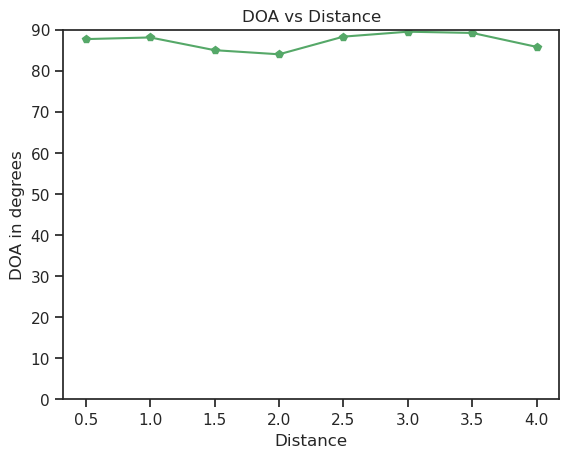

In [41]:
avg_doa = [87.7,88.1,85,84,88.3,89.5,89.2,85.8]

plt.plot(distance_points, avg_doa, marker='p', linestyle='-', color='g')

plt.xlabel('Distance')
plt.ylabel('DOA in degrees')
plt.title('DOA vs Distance')
plt.ylim(0, 90)

plt.show()

#radial plot check
#3d graph of either 0 to 90 angle with x for distance and y for distance and z for SNR
#do the same thing for 4 channels from recording, can we even do it - try to get the raw data
#Also measuring directly from one of four mics in the same way for either all channels combined or 4 channels separated.
#try to measure with a sinewave
#do more distance tests
#what it uses for preprocessing? study.
#echo test? -> different envorinments, try the rough envs
#the reaction to multiple people talking?
#run the sin wive from 20 to 20000 Hz (frequency sweep) -> frequency response check in comparison to the mic graph on the website

#make an algorithm so that it would stick to one signal coming (so that the robot keep looking at you while others talking) -> for later


#for later -> for male/female voice/estonian speech with an accent

#DAW recording filterings? that's for later.


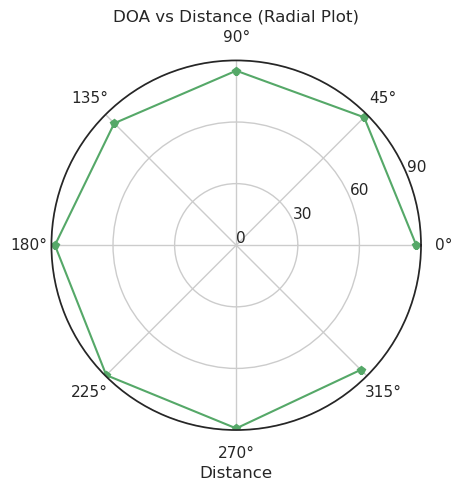

In [48]:
theta = np.radians(np.linspace(0, 360, len(distance_points), endpoint=False))

plt.polar(theta, avg_doa, marker='p', linestyle='-', color='g')

plt.xlabel('Distance')
plt.title('DOA vs Distance (Radial Plot)')
plt.ylim(0, 90)
plt.yticks(np.arange(0, 91, 30))  

plt.show()

In [42]:
#Then try to calculate the speech error and do it for a straight angle as well

def error_rate(correct_text, recognized_text):
    return editdistance.eval(correct_text, recognized_text) / len(correct_text)

error_rates = []
correct = "tere kuidas läheb kas on võimalik mind aidata"

for i in range(1,9):
    audio_path = f'output{i}voice.wav'

    # Recognize text from audio
    with sr.AudioFile(audio_path) as source:
        audio = r.record(source)
    ee_text = r.recognize_google(audio, language="et-EE")

    # Calculate error rate and add it to the array
    error_rate_calculated = error_rate(correct, ee_text)
    error_rates.append(error_rate_calculated)

    print("Error rate: ", error_rate_calculated)

#repeat it, more measurements, more than 4 meters

Error rate:  0.0
Error rate:  0.044444444444444446
Error rate:  0.0
Error rate:  0.0
Error rate:  0.0
Error rate:  0.0
Error rate:  0.0
Error rate:  0.2


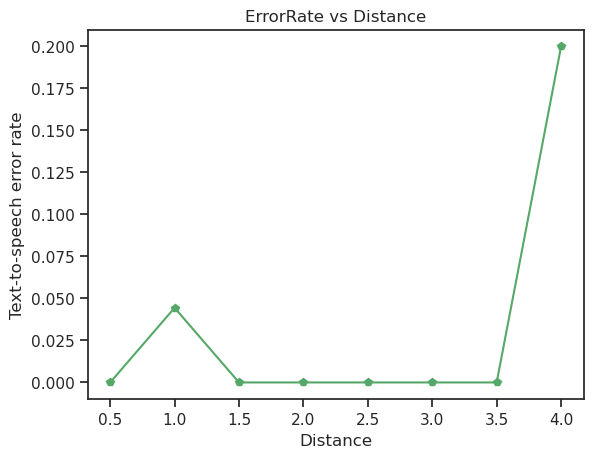

In [43]:
plt.plot(distance_points, error_rates, marker='p', linestyle='-', color='g')

plt.xlabel('Distance')
plt.ylabel('Text-to-speech error rate')
plt.title('ErrorRate vs Distance')
plt.show()

<h2>Second experiment</h2>

In [44]:
signal_array_sin = []

signaal1, sr1 = librosa.load("output1sin.wav")
signaal2, sr2 = librosa.load("output2sin.wav")
signaal3, sr3 = librosa.load("output3sin.wav")
signaal4, sr4 = librosa.load("output4sin.wav")
signaal5, sr5 = librosa.load("output5sin.wav")
signaal6, sr6 = librosa.load("output6sin.wav")
signaal7, sr7 = librosa.load("output7sin.wav")
signaal8, sr8 = librosa.load("output8sin.wav")

signal_array_sin.append(signaal1)
signal_array_sin.append(signaal2)
signal_array_sin.append(signaal3)
signal_array_sin.append(signaal4)
signal_array_sin.append(signaal5)
signal_array_sin.append(signaal6)
signal_array_sin.append(signaal7)
signal_array_sin.append(signaal8)

In [45]:
noise, sr9 = librosa.load("noise5.wav")

In [46]:
snr_list_sin = []
counter = 0
for sig in signal_array_sin:
    noise_free_power = np.mean(np.square(noise))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list_sin.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)

SNR value for the recording number 1  (dB): 20.447275638580322
SNR value for the recording number 2  (dB): 14.029543399810791
SNR value for the recording number 3  (dB): 3.00667405128479
SNR value for the recording number 4  (dB): 10.487396717071533
SNR value for the recording number 5  (dB): 19.256714582443237
SNR value for the recording number 6  (dB): 31.664810180664062
SNR value for the recording number 7  (dB): 23.260366916656494
SNR value for the recording number 8  (dB): 32.31635808944702


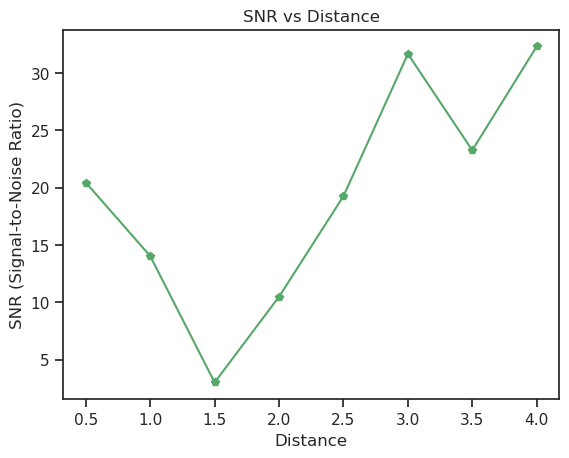

In [47]:
distance_points = [0.5,1,1.5,2,2.5,3,3.5,4]
plt.plot(distance_points, snr_list_sin, marker='p', linestyle='-', color='g')

plt.xlabel('Distance')
plt.ylabel('SNR (Signal-to-Noise Ratio)')
plt.title('SNR vs Distance')
plt.show()

#repeat, perhaps noise supresssion?